<b> 코드스테이츠 AI부트캠프 </b> <br>
https://www.codestates.com/course/ai


<b> 4번째 프로젝트 </b>

▪ <b>주제: </b> 
<u>Crawling</u>, <u>Word Cloud</u> <u>NLP</u>, 및 <u>RNN</u>

▪ <b>내용: </b>

- 내가 설정한 포지션에서 적합한 가설을 세우고 가설을 검증해본다.
- 가설 검증을 위한 딥러닝 파이프라인을 구축해보는 데 의의가 있다.

1) **관심데이터 선정 Plan A, Plan B**<br>
2) **데이터 선정 이유** <br>
3) **데이터를 이용한 가설**<br>
4) **데이터 전처리**<br>
5) **딥러닝 방식 적용**<br>
6) **Chance Level이 넘는 지 확인 (if not) Plan B 적용**<br>
7) **CV 적용하기**<br>
8) **Requirements.txt 만들고, 학습된 모델은 저장**<br>
9) **재구현하기**<br>

▪ <b>작성 방법: </b> 
Colab or PPT작성, 양식 자유 

# 목차
<b> Part 1. Data Crawling & Scraping </b>
<br><br>
**- Crawling : 웹 페이지의 하이퍼링크를 돌아다니며, 웹 페이지를 다운로드 하는 작업**

**- Scraping : 다운로드한 웹 페이지에서 필요한 정보를 추출하는 작업**



1. Python에서 Crawling 

    - 언어적 특성 : 언어가 매우 쉬우며, 라이브러리를 활용할 수 있어, 바로 실무적인 사용이 가능하다. 
    - 라이브러리 활용도 : 객체지향적 특성을 가진 파이썬의 클래스를 이용해, 라이브러리의 기능을 극대화 하여 사용할 수 있다. (함수가 목록형이 아닌 독립적 객체로 사용이 가능한 형태) 
    - 스크레핑 후처리 편리성 : 수집한 데이터를 쉽게 정형데이터 형태로 변환이 가능하다. (Pandas / Numpy 라이브러리 활용) 
    

2. Crawling에 사용되는 주요 Library

    - Beautiful Soup : HTML & XML 문서 분석 라이브러리
    - Selenium : Application Testing 라이브러리 
    - Scrapy : API 및 클래스를 이용한 웹 데이터 수집 라이브러리 

<b> Part 2. Import & Data Check </b>

- 데이터셋 불러오기 및 데이터 확인
- 데이터 속성
- 데이터셋의 변수들을 살펴보면서 발생한 문제점들
- 이상치 탐색 및 제거
- 결측 데이터 확인 및 처리

<b> Part 2. 전처리 </b>
- 결측치 제거
- 줄임표현 수정
- 문자형과 섞인 숫자형 Values 수정 후 Float 처리

<b> Part 3. EDA </b>
- 국가별 판매금액의 차이가 있는가?
- 지역에 따라서 선호하는 게임 장르
- 지역에 따라서 선호하는 플랫폼
- 매출이 높은 제작사의 장르 선택 파악
- 매출이 높은 게임에 대한 분석 및 시각화 프로세스
- 장르별 플랫폼별 퍼블리셔별 군집분석

<b> Part 4. 제안 </b>

 
 
<b> Reference </b> <br>
https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe<br>


# Crawling & Scraping

**MacOS Install**

크롬 드라이버 다운로드

크롬 브라우져를 사용하기 위해 크롬 드라이버를 다운로드
본인의 크롬 브라우져 버전에 맞는 드라이버를 다운로드
크롬 브라우져의 설정 -> 도움말 -> Chrome 정보를 확인
https://sites.google.com/a/chromium.org/chromedriver/downloads
경로 변경

크롬 드라이버를 글로벌하게 사용하기 위해서 경로를 변경해 줍니다.
경로를 수정하지 않으면 코드에서 크롬드라이버 경로를 항상 작성해 줘야 합니다.
$ mv \~/Download/chromedriver /usr/local/bin
셀레니움 파이썬 패키지 설치

`$ sudo pip install selenium`<br>
`$ conda install -c conda-forge selenium`


**Windows Install**


- 크롬 드라이버 다운로드
    - 크롬 브라우져를 사용하기 위해 크롬 드라이버를 다운로드
    - https://sites.google.com/a/chromium.org/chromedriver/downloads
    - https://chromedriver.storage.googleapis.com/index.html?path=2.42/


- 환경변수 추가
    - 내컴퓨터 오른쪽 클릭 -> 속성 -> 고급시스템설정 -> 환경변수 -> 시스템변수의 Path 더블클릭 -> chromedriver path를
추가
    - 예: C:₩Users₩(사용자계정이름)₩chromdriver 으로 추가
    - 환경변수 추가 후에도 드라이버가 실행되지 않는 경우에는 아래의 두가지 방법의 사용이 가능
        - 크롬 드라이버 파일을 동일한 디렉토리에 위치해서 실행
        - 크롬 드라이버를 호출하는 함수에 아규먼트로 크롬 드라이버의 파일경로를 추가
 
 
- 셀레니움 파이썬 패키지 설치
    - `$ conda install -c conda-forge selenium`
    또는
    - `$ pip install --user selenium`

## JobPlatet 기업 평가 데이터 Crawling & Scraping

In [129]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [130]:
# 페이지 접속 
driver = webdriver.Chrome('chromedriver')
driver.get('https://www.jobplanet.co.kr')

In [131]:
# 로그인 
driver.find_element_by_xpath('/html/body/div[1]/div[1]/header/div/div[2]/a[1]/span').click()

In [132]:
driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div/div/form/div/div[2]/div/section[2]/fieldset/label[1]/input').send_keys('kimm9505@koreatech.ac.kr')
driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div/div/form/div/div[2]/div/section[2]/fieldset/label[2]/input').send_keys('Rudals1290@')
time.sleep(1)
driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div/div/form/div/div[2]/div/section[2]/fieldset/button').click()

In [133]:
time.sleep(1)
driver.get('https://www.jobplanet.co.kr/companies/30139/reviews/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90?page=1')

In [134]:
# 오픈되어 있는 창 제거 
driver.find_element_by_xpath('//*[@id="premiumReviewChart"]/div/div[3]/div[2]/div/div[1]/button').click()

In [136]:
# 수집 할 데이터 목록을 리스트로 생성 
comm_list = []  # 한줄평
good_comm_list = []  # 장점
bad_comm_list = []  # 단점
hope_comm_list = []  # 바라는 점
grow_bin_list = []  # 기업성장여부
recomm_list = []  # 기업추천여부

category_list = []  # 직종 
employment_list = []  # 재직여부
region_list = []  # 지역
date_comm_list = []  # 작성시간



In [147]:
# 데이터 수집 
for j in range(0,1000):
    for i in range(1,6):
        try:
            category = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[2]').text
            employment = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[4]').text
            region = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[6]').text
            date_comm = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[8]').text
            comm = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/div[1]/h2').text

            good_comm = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/dl/dd[1]/span').text
#             time.sleep(0.8)
            bad_comm = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/dl/dd[2]/span').text 
            hope_comm = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/dl/dd[2]/span').text
            grow_bin = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/p[1]/strong').text
            recomm = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/p[2]').text

            comm_list.append(comm)
            good_comm_list.append(good_comm) 
            bad_comm_list.append(bad_comm)
            category_list.append(category)
            employment_list.append(employment)
            region_list.append(region)
            date_comm_list.append(date_comm)
            hope_comm_list.append(hope_comm)
            grow_bin_list.append(grow_bin)
            recomm_list.append(recomm)
        
        except Exception as e :
            pass

        finally:
            pass 
    time.sleep(0.7)
    driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/div[6]/article/a[7]').click()

KeyboardInterrupt: 

In [149]:
comm_list2 = []  # 한줄평
good_comm_list2 = []  # 장점
bad_comm_list2 = []  # 단점
hope_comm_list2 = []  # 바라는 점
grow_bin_list2 = []  # 기업성장여부
recomm_list2 = []  # 기업추천여부

category_list2 = []  # 직종 
employment_list2 = []  # 재직여부
region_list2 = []  # 지역
date_comm_list2 = []  # 작성시간

In [155]:
# 데이터 수집 
for j in range(0,1000):
    for i in range(1,6):
        try:
            category2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[2]').text
            employment2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[4]').text
            region2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[6]').text
            date_comm2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[1]/span[8]').text
            comm2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/div[1]/h2').text

            good_comm2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/dl/dd[1]/span').text
            time.sleep(0.8)
            bad_comm2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/dl/dd[2]/span').text 
            hope_comm2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/dl/dd[2]/span').text
            grow_bin2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/p[1]/strong').text
            recomm2 = driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/section['+ str(i) +']/div/div[2]/div/p[2]').text

            comm_list2.append(comm2)
            good_comm_list2.append(good_comm2) 
            bad_comm_list2.append(bad_comm2)
            category_list2.append(category2)
            employment_list2.append(employment2)
            region_list2.append(region2)
            date_comm_list2.append(date_comm2)
            hope_comm_list2.append(hope_comm2)
            grow_bin_list2.append(grow_bin2)
            recomm_list2.append(recomm2)
        
        except Exception as e :
            pass

        finally:
            pass 
    time.sleep(0.7)
    driver.find_element_by_xpath('/html/body/div[1]/div[4]/div/div[1]/div[3]/article[2]/div/div/div/div[6]/article/a[7]').click()

KeyboardInterrupt: 

In [125]:
#브라우져 종료
driver.quit()

# 수집한 데이터 저장

In [126]:
import pandas as pd 

In [148]:
df1 = pd.DataFrame({'직종':category_list,'재직여부':employment_list, '지역':region_list,
              '작성시간':date_comm_list, '한줄평':comm_list, 
              '기업장점':good_comm_list, '기업단점':bad_comm_list,
             '바라는점':hope_comm_list, '기업성장여부':grow_bin_list,
             '기업추천여부':recomm_list})
print(df1.shape)
df1.head()

(3222, 10)


,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,엔지니어링,현직원,경기,2021. 04,"""역시 대기업 복지가 좋다 하지만 일은 많다...""",대기업복지를 누릴수있고 배울점 많은 사람들이 많아 발전할수있음,일이 너무 많아 업무에 치인다. 하는 업무량에 비하면 그다지 높은 연봉이 아님,일이 너무 많아 업무에 치인다. 하는 업무량에 비하면 그다지 높은 연봉이 아님,성장,이 기업을 추천 합니다!
1,IT/인터넷,전직원,경기,2021. 04,"""명실상부, 국내 1위 기업에 대한 프라이드""","자유출퇴근제 운영, 조식 중식 석식 제공, 복지몰 및 복지포인트 제도 운영","서울권에서는 거리가 멀다. 기본적으로 사람이 많다보니, 별로인 사람도 많다.","서울권에서는 거리가 멀다. 기본적으로 사람이 많다보니, 별로인 사람도 많다.",성장,이 기업을 추천 합니다!
2,생산/제조,현직원,경기,2021. 04,"""일개미로서는 그나마 최고의 대우를 받을 수 있는 회사. 연봉 복지 모든게 최고수준...",일반 사기업 중에서는 그나마 연봉 복지가 제일 좋다는점\n어지간한 시스템은 다 갖춰...,고질적인 인력 부족 문제로 인해 업무 진행이 힘든 때가 많음\n부바부가 심함,고질적인 인력 부족 문제로 인해 업무 진행이 힘든 때가 많음\n부바부가 심함,성장,이 기업을 추천 합니다!
3,IT/인터넷,현직원,경기,2021. 04,"""그래도 삼성전자 만한 곳은 없는 것 같다""","다양한 복지 혜택, 무엇보다 자율출퇴근은 굉장히 큰 베네핏으로 다가 온다. 연봉 수...",수원에 위치한 점이 서울 수도권 사람들에게는 단점이 될 수 있음,수원에 위치한 점이 서울 수도권 사람들에게는 단점이 될 수 있음,성장,이 기업을 추천 합니다!
4,생산관리/품질관리,현직원,경기,2021. 04,"""삼성 이름처럼 확실히 다른 기업과는 차별화된 좋은 회사다.""",인수인계 부분에서 깔끔했고 분위기 자체가 다들 열심히하는 분위기,생각보다 급여는 많지 않았다. 계약직이라서 그런듯. 정규직이 짜세다,생각보다 급여는 많지 않았다. 계약직이라서 그런듯. 정규직이 짜세다,성장,이 기업을 추천 합니다!


In [156]:
df2 = pd.DataFrame({'직종':category_list2,'재직여부':employment_list2, '지역':region_list2,
              '작성시간':date_comm_list2, '한줄평':comm_list2, 
              '기업장점':good_comm_list2, '기업단점':bad_comm_list2,
             '바라는점':hope_comm_list2, '기업성장여부':grow_bin_list2,
             '기업추천여부':recomm_list2})
print(df2.shape)
df2.head()

(4573, 10)


,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,마케팅/시장조사,전직원,경기,2018. 10,"""진짜 글로벌 수준에 맞는 기업. 프로세스와 시스템, 복지가 잘 조화된 곳""","제도가 무척 잘 되어있어. 자율근무 가능하고 연차 문제 없음. 사내 복지 (식사, ...",위로갈수록 의미없이 있는 시니어들이 많음. 윗사람말이 법이라 자율성이 제한적임. 실...,위로갈수록 의미없이 있는 시니어들이 많음. 윗사람말이 법이라 자율성이 제한적임. 실...,성장,이 기업을 추천 합니다!
1,IT/인터넷,전직원,경기,2018. 10,"""업무를 진행함에 있어 자신감을 가지고 인정받으며 일할수 있는 자부심이 있는 기업""",신입직원의 교육이 철저하여 가르처서 써먹는다는 의식이 강한 기업으로 3-4년정도 경...,업무가 나노단위로 세분화 되어있어서 전문성은 키워지나 전체를 보는데 한계가 있음,업무가 나노단위로 세분화 되어있어서 전문성은 키워지나 전체를 보는데 한계가 있음,성장,이 기업을 추천 합니다!
2,IT/인터넷,전직원,서울,2018. 10,"""다양한 경험이 가능하고 사람들과의 관계가 아주 좋습니다.""",사업기반이 안정적이며 복지가 아주 좋습니다. 연차를 쓸때도 상사의 눈치 없이 쓸수 ...,"과장, 차장이 많아 승진이 힘들다. 야근이 많은 편이지만 많은 일들을 배울수 있다","과장, 차장이 많아 승진이 힘들다. 야근이 많은 편이지만 많은 일들을 배울수 있다",성장,이 기업을 추천 합니다!
3,연구개발,현직원,경기,2018. 10,"""확실히 대기업은 대기업이다. 좋던 나쁘던 회사내 시스템은 잘 갖춰져있다는것을 느낀...",명실상부 대한민국 최고의 기업이다. 여러가지로 경력과 이력에 도움이 된다. 자신보다...,근래들어 눈에띠게 실리콘밸리 기업들의 경영기법이나 마인드를 이식하려 들지만 아직도 ...,근래들어 눈에띠게 실리콘밸리 기업들의 경영기법이나 마인드를 이식하려 들지만 아직도 ...,성장,이 기업을 추천 합니다!
4,인사/총무,현직원,경기,2018. 10,"""현재는 글로벌 대기업, 복지와 연봉은 국내 대기업\n부서별 분위기가 매우 상이함""",복지와 연봉은 국내 중 좋은편임\n직군별로 부서 분위기가 상이하지만\nSW 직군들은...,글로벌 기업의 복지를 목표로 하지만\n지원 직군들의 문화가 매우 막혀있음,글로벌 기업의 복지를 목표로 하지만\n지원 직군들의 문화가 매우 막혀있음,비슷,이 기업을 추천 합니다!


In [157]:
df1.duplicated().sum()

373

In [158]:
df2.duplicated().sum()

3592

In [161]:
df2.drop_duplicates()

,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,마케팅/시장조사,전직원,경기,2018. 10,"""진짜 글로벌 수준에 맞는 기업. 프로세스와 시스템, 복지가 잘 조화된 곳""","제도가 무척 잘 되어있어. 자율근무 가능하고 연차 문제 없음. 사내 복지 (식사, ...",위로갈수록 의미없이 있는 시니어들이 많음. 윗사람말이 법이라 자율성이 제한적임. 실...,위로갈수록 의미없이 있는 시니어들이 많음. 윗사람말이 법이라 자율성이 제한적임. 실...,성장,이 기업을 추천 합니다!
1,IT/인터넷,전직원,경기,2018. 10,"""업무를 진행함에 있어 자신감을 가지고 인정받으며 일할수 있는 자부심이 있는 기업""",신입직원의 교육이 철저하여 가르처서 써먹는다는 의식이 강한 기업으로 3-4년정도 경...,업무가 나노단위로 세분화 되어있어서 전문성은 키워지나 전체를 보는데 한계가 있음,업무가 나노단위로 세분화 되어있어서 전문성은 키워지나 전체를 보는데 한계가 있음,성장,이 기업을 추천 합니다!
2,IT/인터넷,전직원,서울,2018. 10,"""다양한 경험이 가능하고 사람들과의 관계가 아주 좋습니다.""",사업기반이 안정적이며 복지가 아주 좋습니다. 연차를 쓸때도 상사의 눈치 없이 쓸수 ...,"과장, 차장이 많아 승진이 힘들다. 야근이 많은 편이지만 많은 일들을 배울수 있다","과장, 차장이 많아 승진이 힘들다. 야근이 많은 편이지만 많은 일들을 배울수 있다",성장,이 기업을 추천 합니다!
3,연구개발,현직원,경기,2018. 10,"""확실히 대기업은 대기업이다. 좋던 나쁘던 회사내 시스템은 잘 갖춰져있다는것을 느낀...",명실상부 대한민국 최고의 기업이다. 여러가지로 경력과 이력에 도움이 된다. 자신보다...,근래들어 눈에띠게 실리콘밸리 기업들의 경영기법이나 마인드를 이식하려 들지만 아직도 ...,근래들어 눈에띠게 실리콘밸리 기업들의 경영기법이나 마인드를 이식하려 들지만 아직도 ...,성장,이 기업을 추천 합니다!
4,인사/총무,현직원,경기,2018. 10,"""현재는 글로벌 대기업, 복지와 연봉은 국내 대기업\n부서별 분위기가 매우 상이함""",복지와 연봉은 국내 중 좋은편임\n직군별로 부서 분위기가 상이하지만\nSW 직군들은...,글로벌 기업의 복지를 목표로 하지만\n지원 직군들의 문화가 매우 막혀있음,글로벌 기업의 복지를 목표로 하지만\n지원 직군들의 문화가 매우 막혀있음,비슷,이 기업을 추천 합니다!
...,...,...,...,...,...,...,...,...,...,...
4567,경영/기획/컨설팅,전직원,서울,2016. 06,"""업무량이 많습니다. 열심히 한다고 승진하기에는 부족합니다.""",연봉과 복지 혜택이 다른회사에 비해 월등합니다.\n기업의 다향한 복지 혜택이 있습니다.,승진하기 어려움\n보통의 실력으로는 살아남기가 어렵습니다.,승진하기 어려움\n보통의 실력으로는 살아남기가 어렵습니다.,성장,이 기업을 추천 합니다!
4568,영업/제휴,현직원,경기,2016. 06,"""국내 몇 안되는 글로벌 탑 기업으로 모든 일이 대규모임""",글로벌 1위 기업. 복지 혜택. 연말 대규모 상여. 진행하는 일의 규모가 커서 좋은...,보수적. 탑다운방식의 경영. 업무강도가 높음. 같은 일을 챙기는 경영층이 많아 보고...,보수적. 탑다운방식의 경영. 업무강도가 높음. 같은 일을 챙기는 경영층이 많아 보고...,비슷,이 기업을 추천하지 않습니다.
4570,마케팅/시장조사,전직원,경기,2016. 06,"""일해보면 좋은 회사. 단, 앞으로의 먹거리는 깊이 고민해야 할 부분""",글로벌 기업의 면모를 느낄 수 있음. 연봉은 인센티브에 따라 크게 달라짐.,수많은 임원들로 의사결정의 층위가 많아 보고업무가 많음. 보고체계는 복잡하나 임원들...,수많은 임원들로 의사결정의 층위가 많아 보고업무가 많음. 보고체계는 복잡하나 임원들...,비슷,이 기업을 추천 합니다!
4571,연구개발,전직원,경기,2016. 06,"""개발자가 역량을 발휘할수 있는 시스템을 모두 갖췄다""","복지는 국내 최고, 통근버스 지원, 캐러비안베이,에버랜드, 삼성병원 검진, 가전제품...",성과 스트레스가 많다. 끊임없는 개발 프로젝트에 아웃풋을 내기위해서 시달린다. 성과...,성과 스트레스가 많다. 끊임없는 개발 프로젝트에 아웃풋을 내기위해서 시달린다. 성과...,비슷,이 기업을 추천 합니다!


In [160]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4568    False
4569     True
4570    False
4571    False
4572    False
Length: 4573, dtype: bool

# 데이터 중복제거 및 병합

중복 제거

In [162]:
print('df1 중복 제거 전 Shape :',df1.shape)
print('df2 중복 제거 전 Shape :',df2.shape)

df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

print('df1 중복 제거 후 Shape :',df1.shape)
print('df2 중복 제거 후 Shape :',df2.shape)

df1 중복 제거 전 Shape (3222, 10)
df2 중복 제거 전 Shape (4573, 10)
df1 중복 제거 후 Shape (2849, 10)
df2 중복 제거 후 Shape (981, 10)


병합

In [164]:
df = pd.concat([df1, df2], axis = 0)
print('병합된 데이터 Shape :',df.shape)
df.head()

병합된 데이터 Shape : (3830, 10)


,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,엔지니어링,현직원,경기,2021. 04,"""역시 대기업 복지가 좋다 하지만 일은 많다...""",대기업복지를 누릴수있고 배울점 많은 사람들이 많아 발전할수있음,일이 너무 많아 업무에 치인다. 하는 업무량에 비하면 그다지 높은 연봉이 아님,일이 너무 많아 업무에 치인다. 하는 업무량에 비하면 그다지 높은 연봉이 아님,성장,이 기업을 추천 합니다!
1,IT/인터넷,전직원,경기,2021. 04,"""명실상부, 국내 1위 기업에 대한 프라이드""","자유출퇴근제 운영, 조식 중식 석식 제공, 복지몰 및 복지포인트 제도 운영","서울권에서는 거리가 멀다. 기본적으로 사람이 많다보니, 별로인 사람도 많다.","서울권에서는 거리가 멀다. 기본적으로 사람이 많다보니, 별로인 사람도 많다.",성장,이 기업을 추천 합니다!
2,생산/제조,현직원,경기,2021. 04,"""일개미로서는 그나마 최고의 대우를 받을 수 있는 회사. 연봉 복지 모든게 최고수준...",일반 사기업 중에서는 그나마 연봉 복지가 제일 좋다는점\n어지간한 시스템은 다 갖춰...,고질적인 인력 부족 문제로 인해 업무 진행이 힘든 때가 많음\n부바부가 심함,고질적인 인력 부족 문제로 인해 업무 진행이 힘든 때가 많음\n부바부가 심함,성장,이 기업을 추천 합니다!
3,IT/인터넷,현직원,경기,2021. 04,"""그래도 삼성전자 만한 곳은 없는 것 같다""","다양한 복지 혜택, 무엇보다 자율출퇴근은 굉장히 큰 베네핏으로 다가 온다. 연봉 수...",수원에 위치한 점이 서울 수도권 사람들에게는 단점이 될 수 있음,수원에 위치한 점이 서울 수도권 사람들에게는 단점이 될 수 있음,성장,이 기업을 추천 합니다!
4,생산관리/품질관리,현직원,경기,2021. 04,"""삼성 이름처럼 확실히 다른 기업과는 차별화된 좋은 회사다.""",인수인계 부분에서 깔끔했고 분위기 자체가 다들 열심히하는 분위기,생각보다 급여는 많지 않았다. 계약직이라서 그런듯. 정규직이 짜세다,생각보다 급여는 많지 않았다. 계약직이라서 그런듯. 정규직이 짜세다,성장,이 기업을 추천 합니다!


# Library Import

In [168]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from IPython.display import set_matplotlib_formats

mpl.rc('font',family='Malgun Gothic')


mpl.rc('axes', unicode_minus = True)

set_matplotlib_formats('retina')

# Data Preprocessing

Missing Data Check - 없음

In [166]:
df.isnull().sum()

직종        0
재직여부      0
지역        0
작성시간      0
한줄평       0
기업장점      0
기업단점      0
바라는점      0
기업성장여부    0
기업추천여부    0
dtype: int64

기업추천여부 문장 -> 단어로 축소시키기

In [181]:
df['기업추천여부'].value_counts()

이 기업을 추천 합니다!       3122
이 기업을 추천하지 않습니다.     708
Name: 기업추천여부, dtype: int64

In [183]:
df['기업추천여부'] = df['기업추천여부'].replace({'이 기업을 추천 합니다!':'추천', '이 기업을 추천하지 않습니다.':'비추천'})
df['기업추천여부'].value_counts()

추천     3122
비추천     708
Name: 기업추천여부, dtype: int64

Count가능한 변수들 분포 확인
- 직종
- 재직여부
- 지역
- 기업성장여부
- 기업추천여부

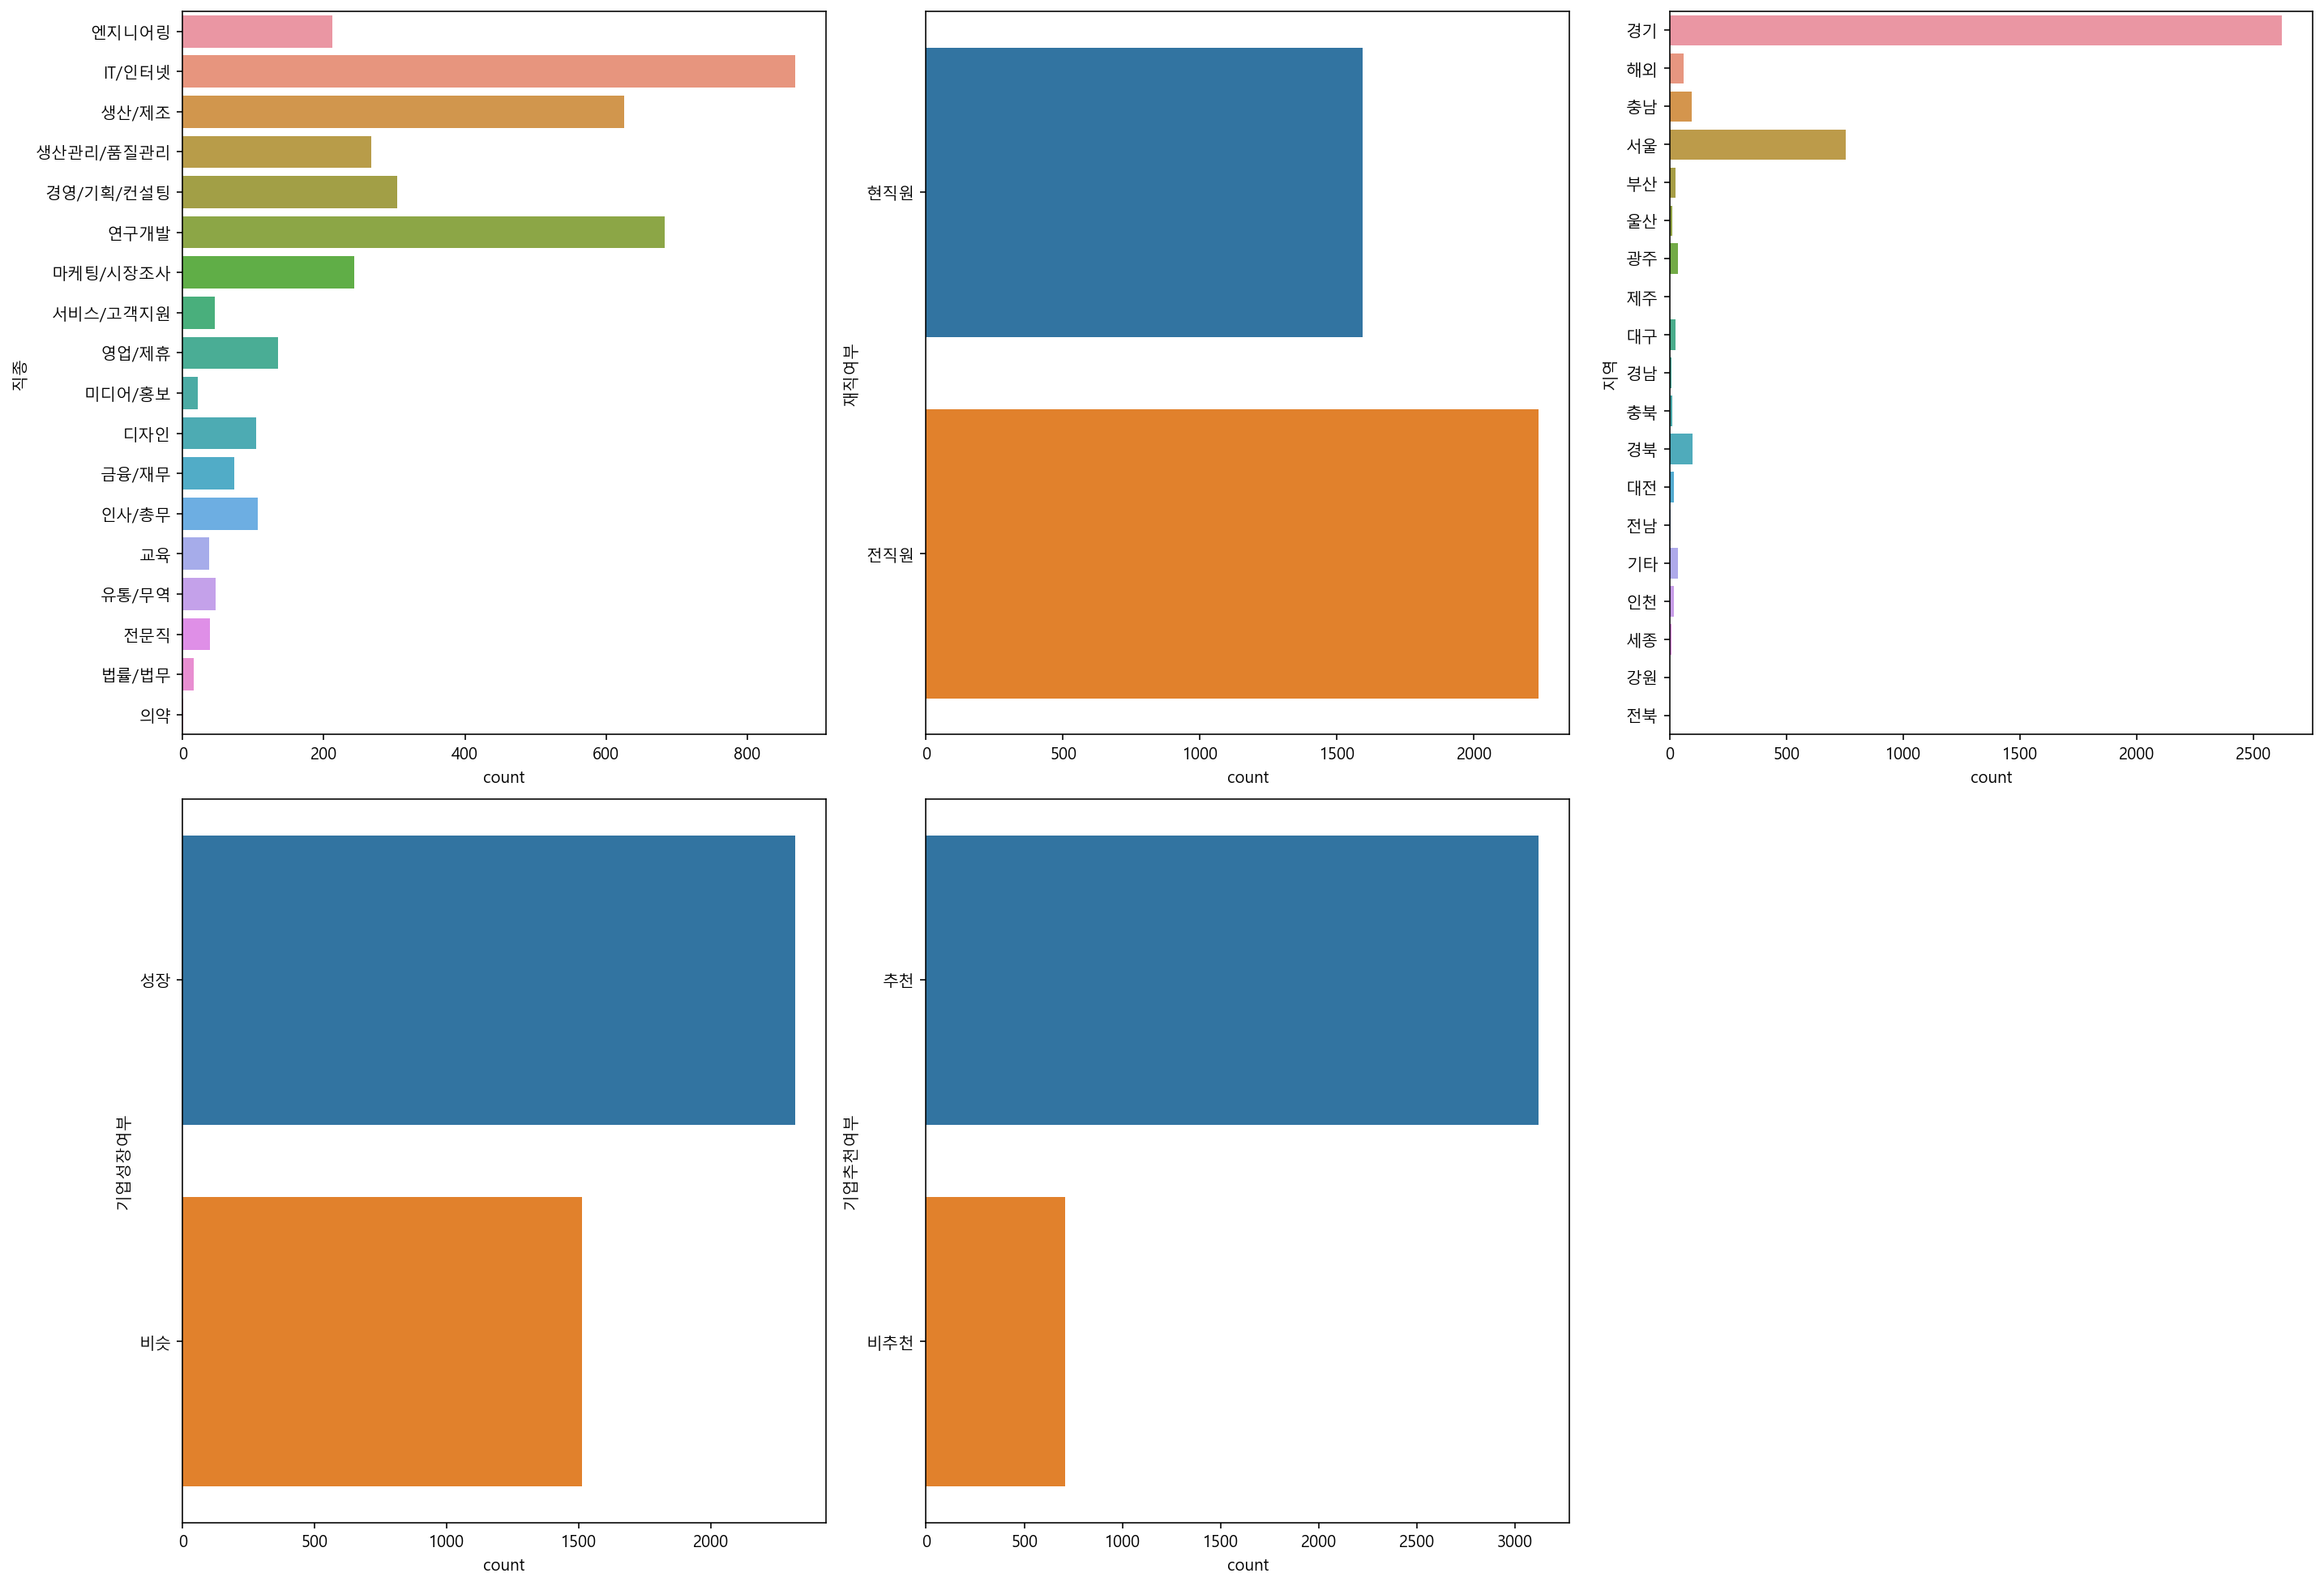

In [184]:
features = ['직종','재직여부','지역','기업성장여부','기업추천여부']
n = 1
plt.figure(figsize=(20,20))
for feature in features:
    plt.subplot(3,3,n)
    sns.countplot(y= df[feature]);
    n+=1
    plt.tight_layout();

# 자연어 처리

In [185]:
import konlpy
from konlpy.tag import Okt

In [186]:
okt = Okt()

In [191]:
#예시
pos_data = pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[0]))
pos_data

,0,1
0,"""",Punctuation
1,역시,Noun
2,대기업,Noun
3,복지,Noun
4,가,Josa
5,좋다,Adjective
6,하지만,Conjunction
7,일,Noun
8,은,Josa
9,많다,Adjective


In [192]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['한줄평'])):
    dfn = pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns = {0:'형태소', 1:'품사'})
df_Pos.shape

(53163, 2)

In [196]:
pd.DataFrame(df_Pos['품사'].value_counts())

,품사
Noun,21763
Josa,9147
Punctuation,7784
Verb,5378
Adjective,5169
Suffix,1047
Modifier,787
Adverb,787
Foreign,410
Alpha,229


빈도수가 가장 많은 명사

In [202]:
cond1 = (df_Pos['품사'] == 'Noun')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
pd.DataFrame(df_N.value_counts('형태소')).rename(columns = {0:'빈도수'}).head(10)

(21763, 2)


,빈도수
형태소,
회사,963
기업,763
수,594
최고,504
복지,496
일,459
곳,445
대기업,397
연봉,310


# Word Cloud

`!pip install --user wordcloud`

## 명사

### 한줄평 워드클라우드

In [203]:
from wordcloud import WordCloud, STOPWORDS

In [211]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='malgun.ttf').generate(' '.join(df_N['형태소']))

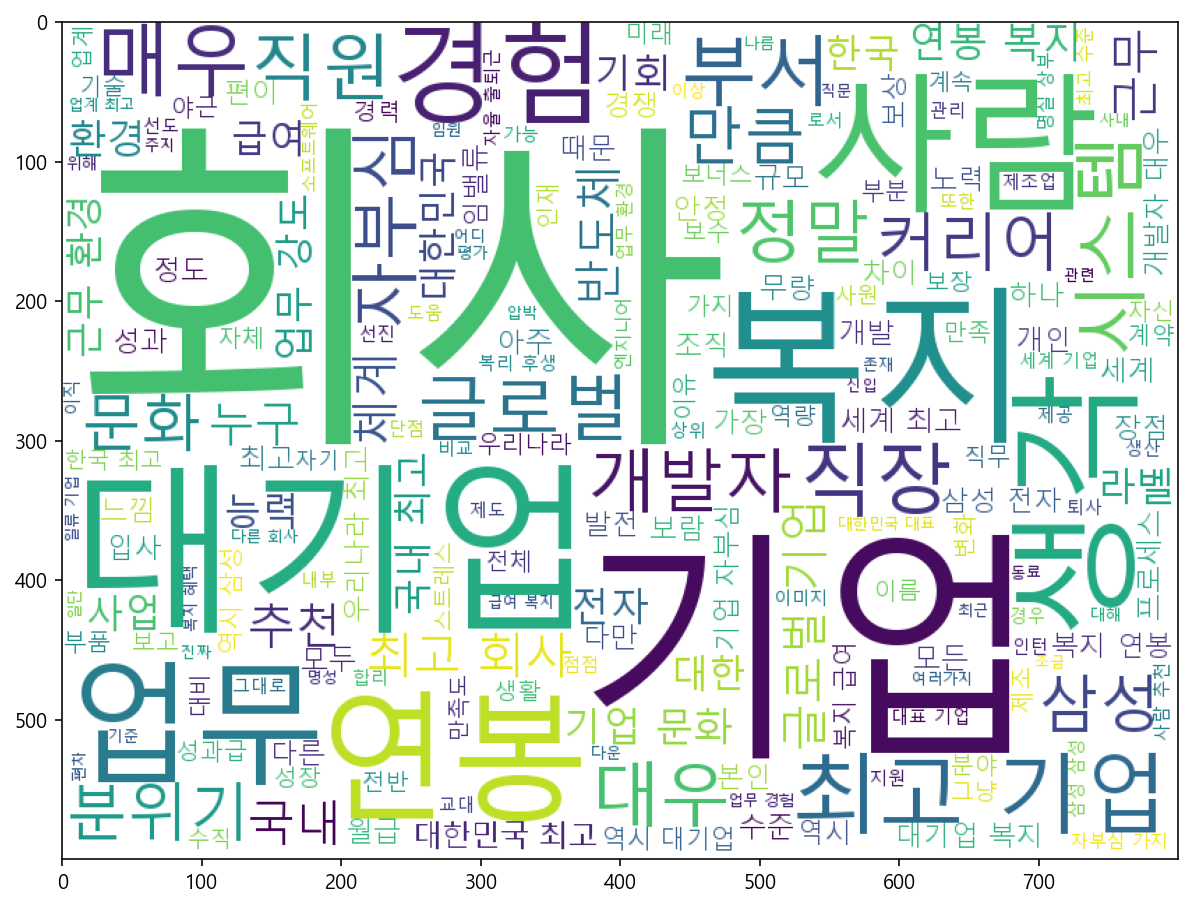

In [212]:
plt.figure(figsize=([10,10]))
plt.imshow(wc)
plt.show()

### 장점 워드클라우드

In [213]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업장점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업장점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [214]:
cond1 = (df_Pos['품사']=='Noun')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(31030, 2)


,형태소,품사
0,대기업,Noun
1,복지,Noun
5,점,Noun
7,사람,Noun
11,발전,Noun


In [216]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='malgun.ttf').generate(' '.join(df_N['형태소']))

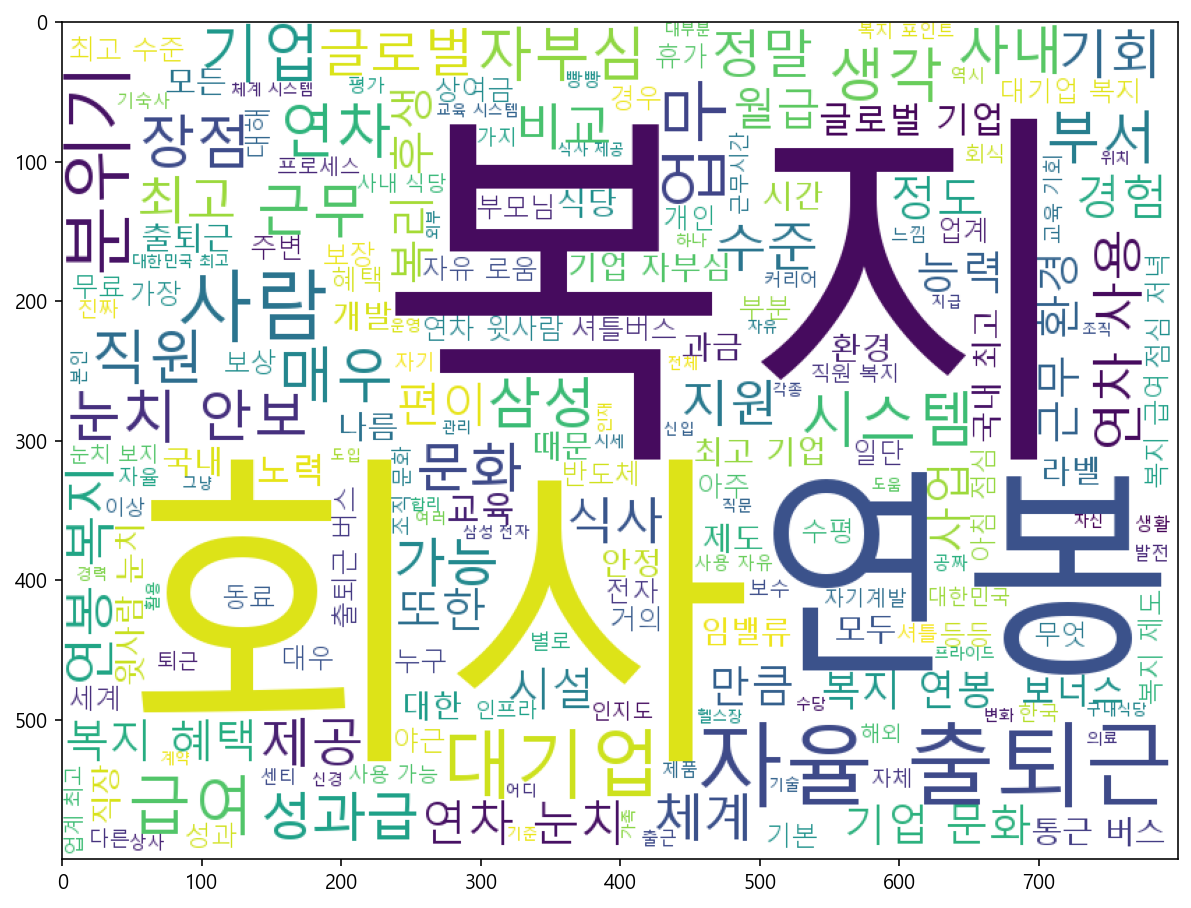

In [217]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

### 단점 워드클라우드

In [218]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업단점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업단점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [219]:
cond1 = (df_Pos['품사']=='Noun')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(30719, 2)


,형태소,품사
3,업무,Noun
8,업,Noun
9,무량,Noun
11,비,Noun
13,그다지,Noun


In [220]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='malgun.ttf').generate(' '.join(df_N['형태소']))

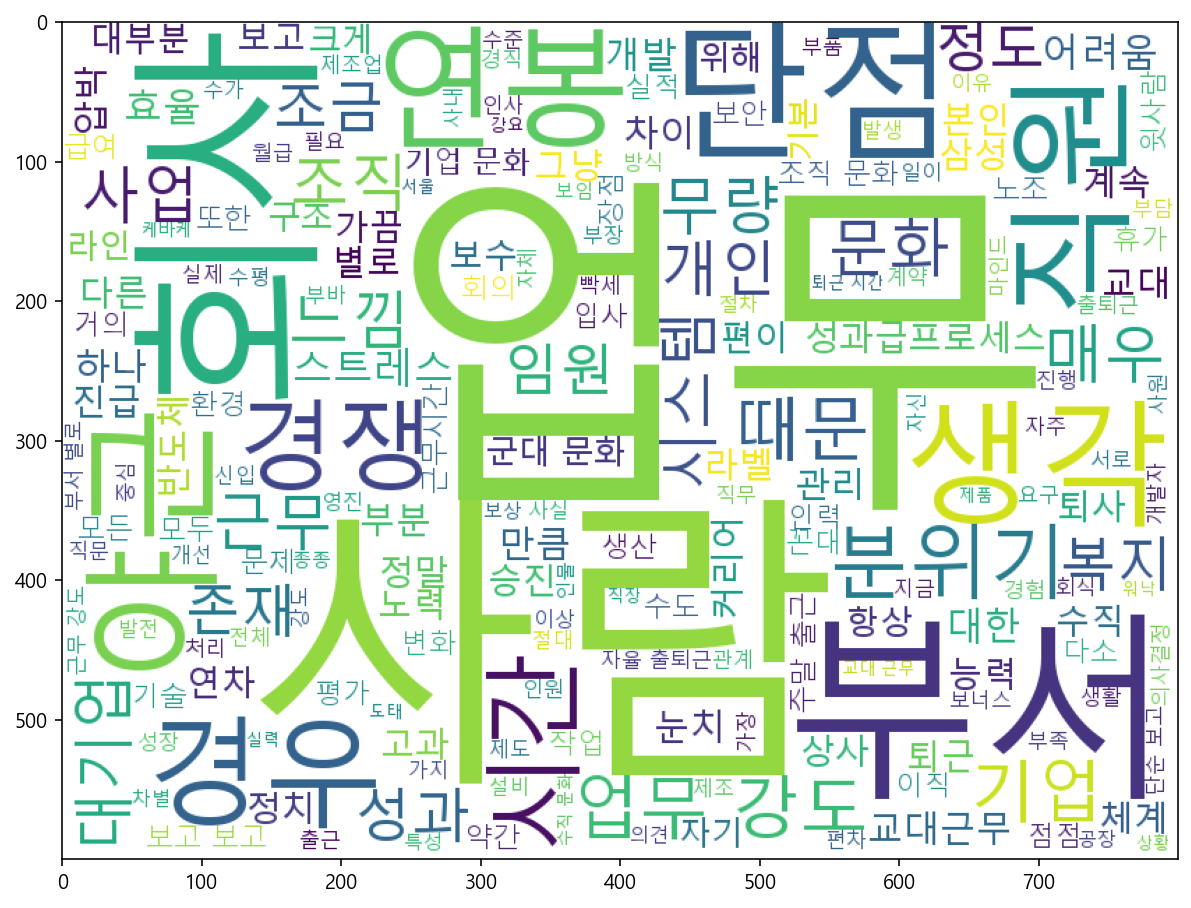

In [221]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

## 형용사

### 한줄평 워드클라우드

In [222]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['한줄평'])) :
    dfn =  pd.DataFrame(okt.pos(df1['한줄평'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [223]:
cond1 = (df_Pos['품사']=='Adjective')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(5169, 2)


,형태소,품사
5,좋다,Adjective
9,많다,Adjective
11,있는,Adjective
21,솔직히,Adjective
22,충분한,Adjective


In [224]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='malgun.ttf').generate(' '.join(df_N['형태소']))

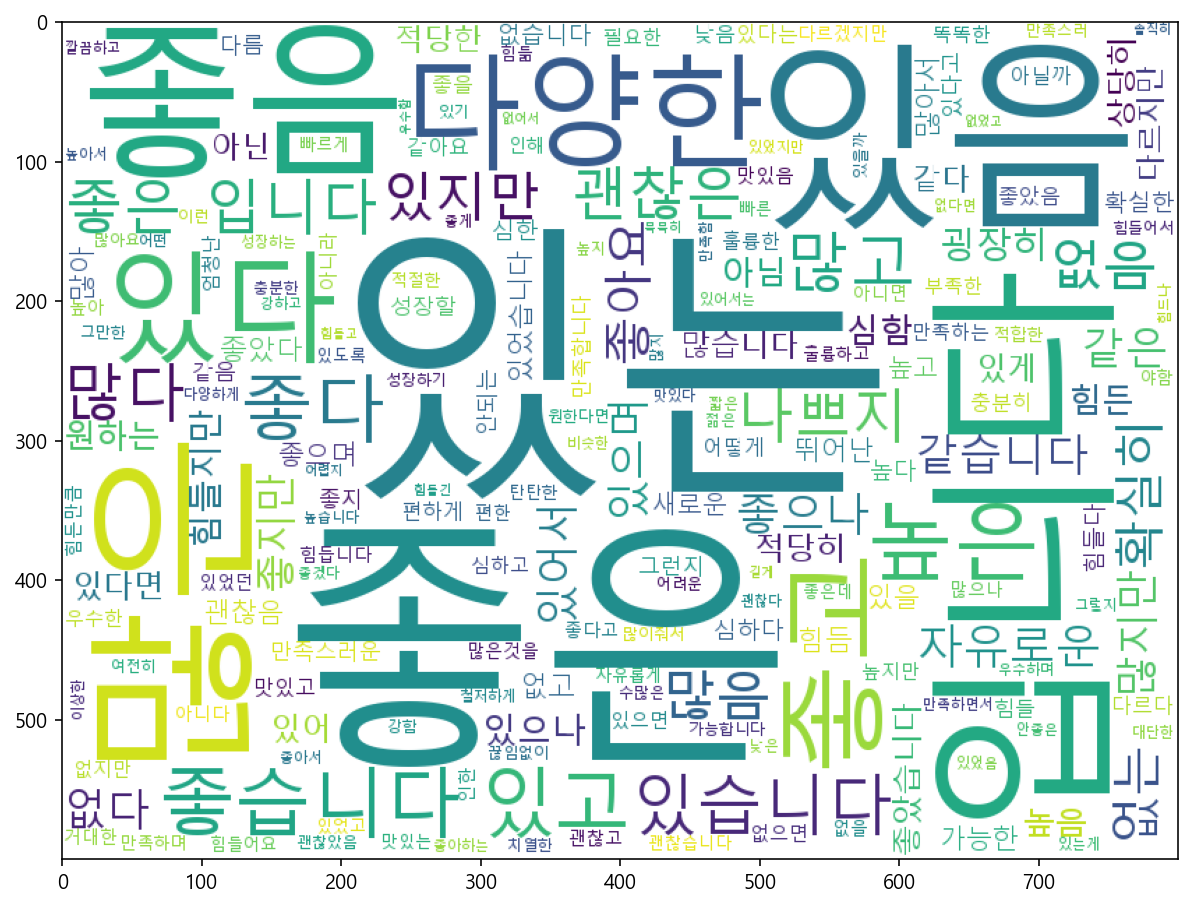

In [225]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

### 장점 워드클라우드

In [230]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업장점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업장점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [231]:
cond1 = (df_Pos['품사']=='Adjective')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(6954, 2)


,형태소,품사
6,많은,Adjective
10,많아,Adjective
10,좋다는,Adjective
13,어지간한,Adjective
0,다양한,Adjective


In [232]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='malgun.ttf').generate(' '.join(df_N['형태소']))

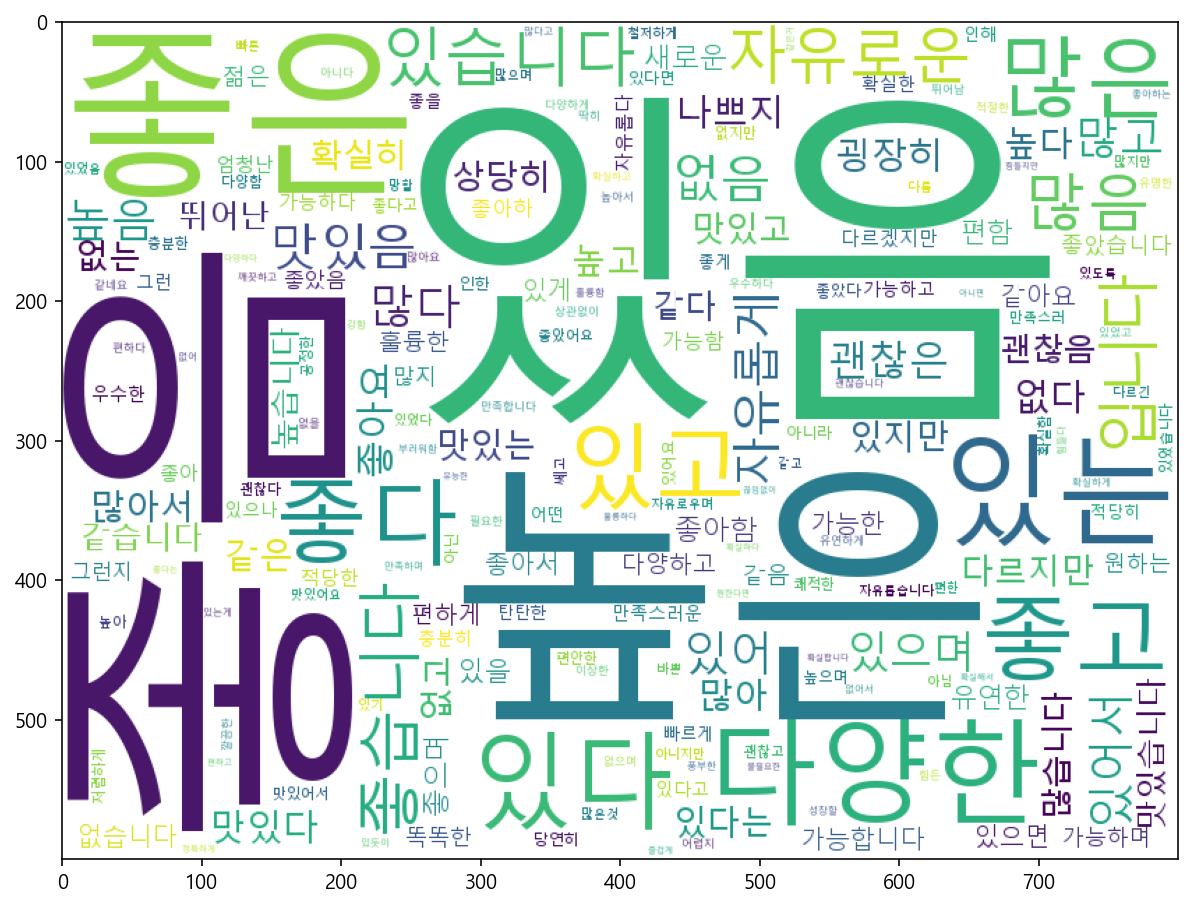

In [233]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

### 단점 워드클라우드

In [234]:
df_Pos = pd.DataFrame()
for i in range(0, len(df1['기업단점'])) :
    dfn =  pd.DataFrame(okt.pos(df1['기업단점'].values.tolist()[i]))
    df_Pos = pd.concat([df_Pos, dfn])
    
df_Pos = df_Pos.rename(columns={0:'형태소',1:'품사'})

In [235]:
cond1 = (df_Pos['품사']=='Adjective')
df_N = df_Pos.loc[cond1]
print(df_N.shape)
df_N.head()

(7348, 2)


,형태소,품사
2,많아,Adjective
14,높은,Adjective
17,아님,Adjective
5,멀다,Adjective
12,많다,Adjective


In [236]:
DATA_IN_PATH = './data_in/'
wc = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=600, font_path='malgun.ttf').generate(' '.join(df_N['형태소']))

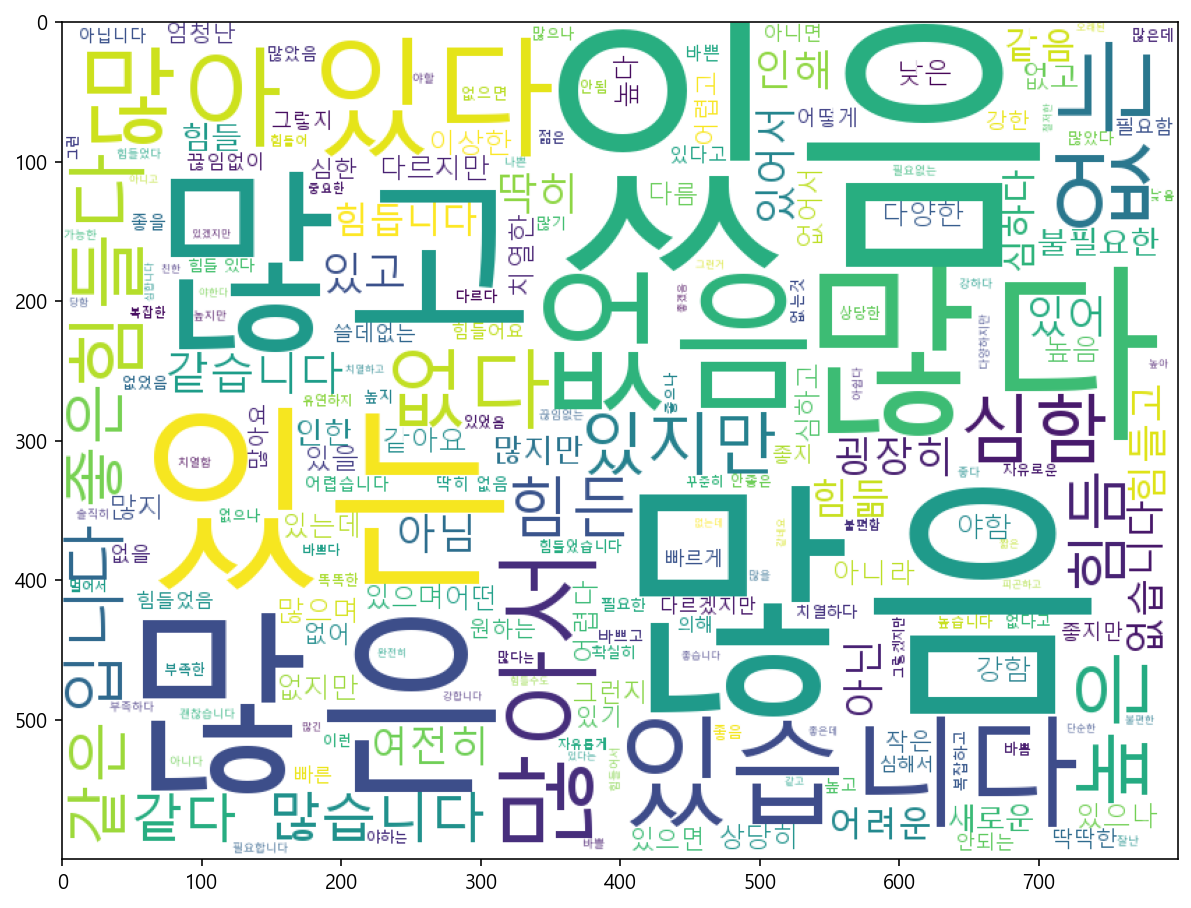

In [237]:
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()